clustering 

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

loading libararies

In [4]:
df = pd.read_csv(r"C:\Users\hegde\OneDrive\Desktop\Dataset\grayscale_images.csv")

In [5]:
X = df.drop('label', axis=1).values  
X = X.reshape(X.shape[0], -1)  

Flattening Data: when working with multi-dimensional data (like images), reshaping ensures that each instance is represented as a flat vector, which many machine learning algorithms require as input.
Preprocessing for ML Models: logistic regression, support vector machines (SVMs), and multi-layer perceptrons (MLPs), expect a 2D input matrix where rows represent instances and columns represent features. This reshaping ensures the data is in the correct format.

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Standardising and Scaleing

In [9]:
pca = PCA(n_components=50)  
X_pca = pca.fit_transform(X_scaled)

PCA(n_components=50) creates a PCA model to reduce the dataset to 50 components.
fit_transform(X_scaled) computes the principal components and transforms the data into this lower-dimensional space.
The transformed data, X_pca, now contains 50 principal components that capture most of the variance in the original data, improving computational efficiency while retaining important information.

In [11]:
kmeans = KMeans(n_clusters=11, random_state=42) 
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

C:\Users\hegde\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=11, random_state=42): Creates a K-Means model with 11 clusters.
fit(X_pca): Fits the model to the PCA-reduced data, finding 11 cluster centroids and assigning data points to the nearest clusters.
kmeans.labels_: Retrieves the cluster labels for each data point, indicating which of the 11 clusters it belongs to.

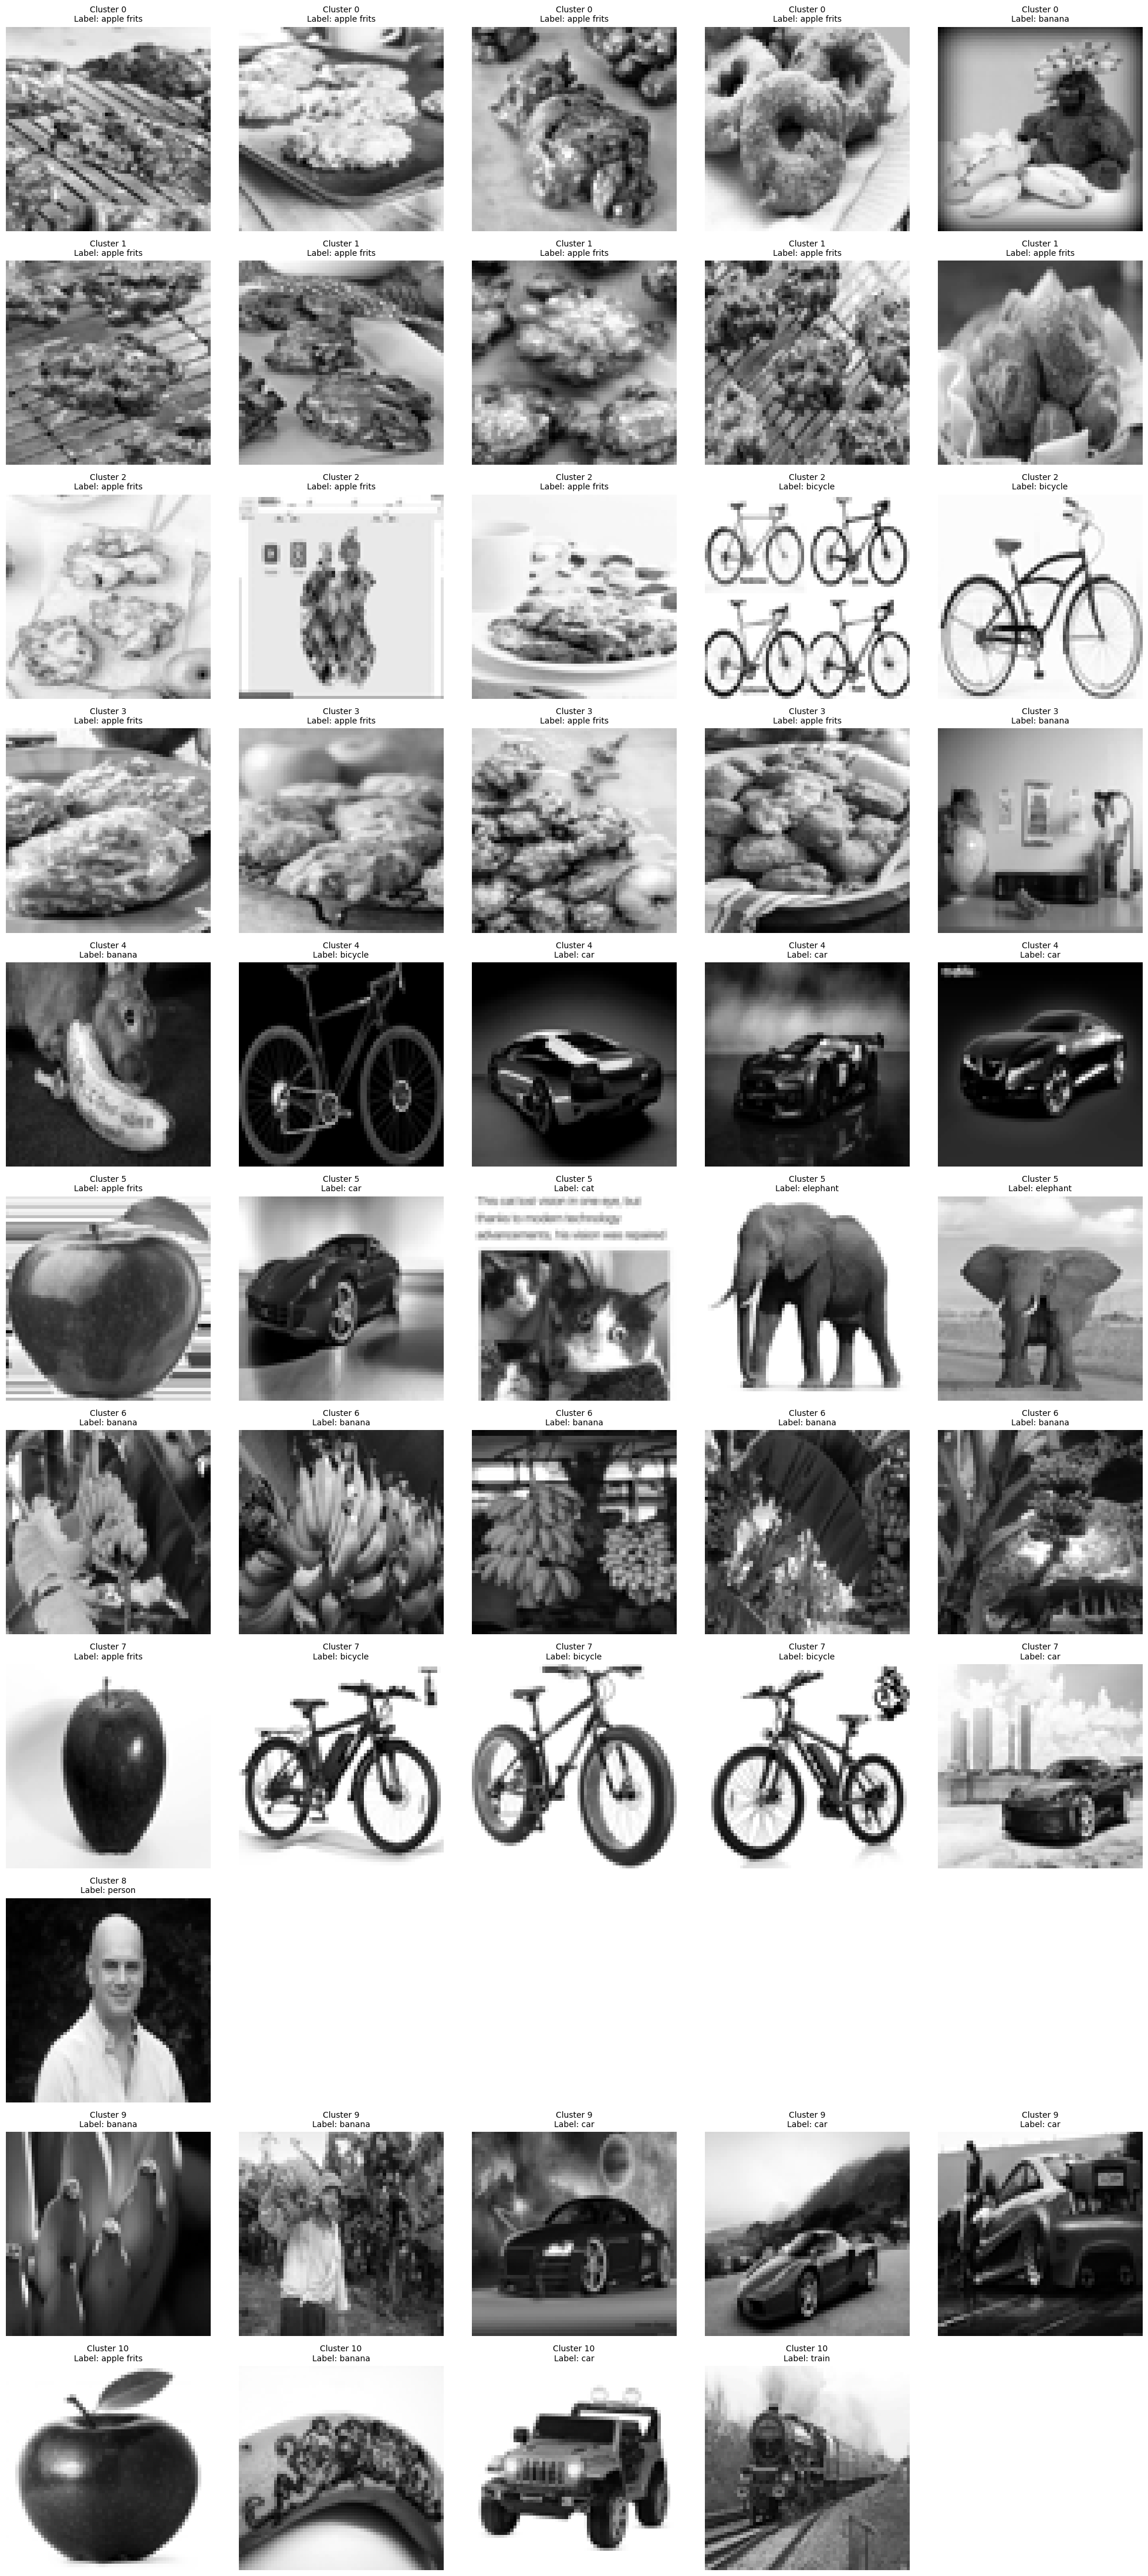

In [22]:
clusters = np.unique(cluster_labels) 
category_labels = df['label'].values  
plt.figure(figsize=(20, len(clusters) * 4))  

num_images = 5  

for i, cluster in enumerate(clusters):
    cluster_images = X[cluster_labels == cluster]  
    cluster_category_labels = category_labels[cluster_labels == cluster]    
    if len(cluster_images) == 0:
        continue 
    for j in range(min(num_images, len(cluster_images))):
        img_data = cluster_images[j].reshape(64, 64)  
        plt.subplot(len(clusters), num_images, i * num_images + j + 1)  
        plt.imshow(img_data, cmap='gray')
        plt.axis('off')
        plt.title(f"Cluster {cluster}\nLabel: {cluster_category_labels[j]}", fontsize=10)

plt.tight_layout()
plt.show()

This code visually compares the clusters created by the clustering algorithm by displaying sample images from each cluster. Each row represents a different cluster, and each image is labeled with its original category. This helps in understanding how the clustering algorithm grouped similar images together.

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [26]:
y = df['label'].values  
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y)

In [28]:
conf_matrix = confusion_matrix(y_numeric, cluster_labels)

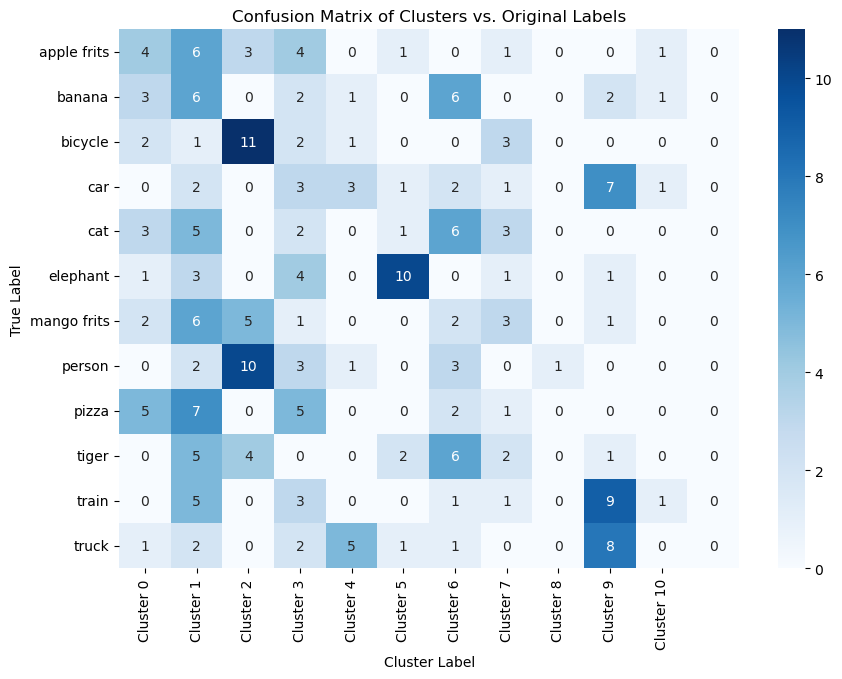

In [30]:
plt.figure(figsize=(10, 7))
num_clusters = len(np.unique(cluster_labels))
cluster_labels_custom = [f"Cluster {i}" for i in range(num_clusters)]
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=cluster_labels_custom, yticklabels=label_encoder.classes_)
plt.xlabel('Cluster Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Clusters vs. Original Labels')
plt.show()

confussion matrix : it shows how many are correctly predicted , true positives, true negetives, flase positives and false negetives

In [32]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

loading libraries for valuation for the clusters 

In [34]:
cluster_range = range(2, 13)
silhouette_scores = []
davies_bouldin_scores = []
inertia_values = []

for different k values (k=2,3,4,....,13) how the silhotte, davies bouldin and elbow method gives different values

In [36]:
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)    
    if len(np.unique(cluster_labels)) > 1:
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(float('nan'))    
    db_score = davies_bouldin_score(X, cluster_labels)
    davies_bouldin_scores.append(db_score)    
    inertia_values.append(kmeans.inertia_)

C:\Users\hegde\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hegde\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hegde\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hegde\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [37]:
print(f"Length of cluster_range: {len(cluster_range)}")
print(f"Length of silhouette_scores: {len(silhouette_scores)}")
print(f"Length of davies_bouldin_scores: {len(davies_bouldin_scores)}")
print(f"Length of inertia_values: {len(inertia_values)}")

Length of cluster_range: 11
Length of silhouette_scores: 11
Length of davies_bouldin_scores: 11
Length of inertia_values: 11


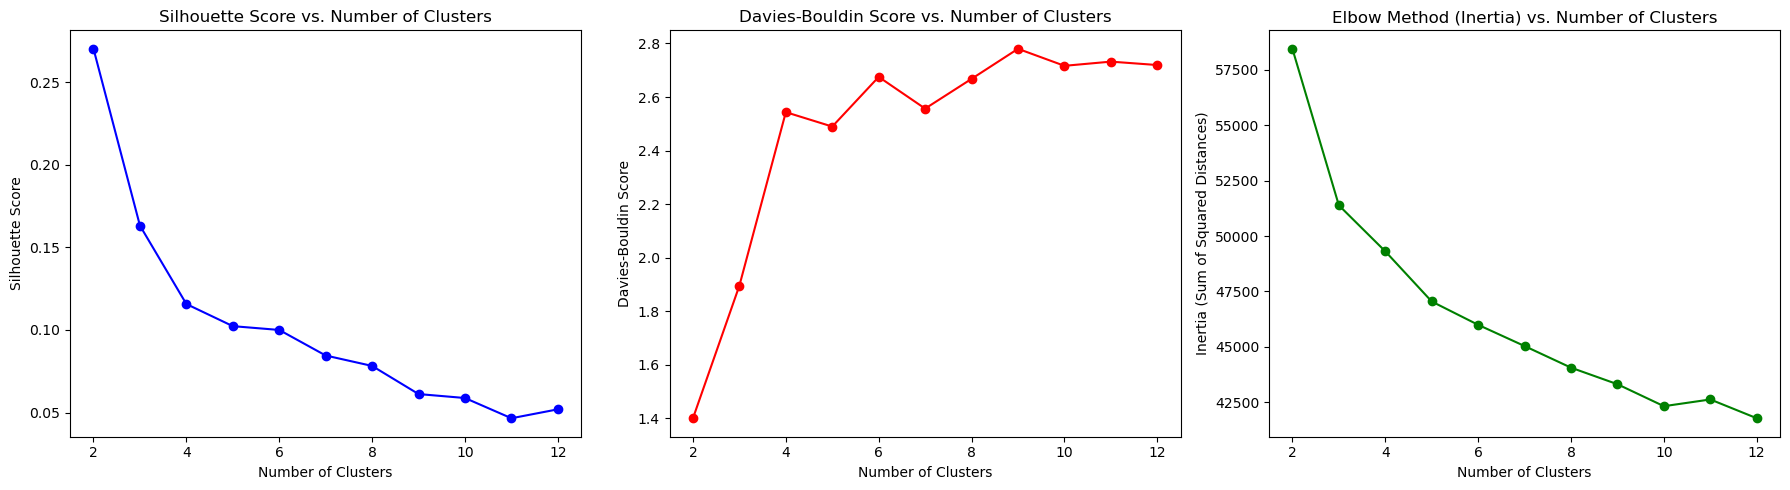

In [38]:
plt.figure(figsize=(18, 5))
# Silhouette Score Plot
plt.subplot(1, 3, 1)
plt.plot(cluster_range, silhouette_scores, marker='o', color='b')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Davies-Bouldin Score Plot
plt.subplot(1, 3, 2)
plt.plot(cluster_range, davies_bouldin_scores, marker='o', color='r')
plt.title('Davies-Bouldin Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Score')

# Elbow Method Plot (Inertia)
plt.subplot(1, 3, 3)
plt.plot(cluster_range, inertia_values, marker='o', color='g')
plt.title('Elbow Method (Inertia) vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')

plt.tight_layout()
plt.show()

these are the plot  of valuations  where it gives that how for every different values of k the score is varies 

silhotte score says the optimal no. of k is 4

Davies-Bouldin score says 4

Even the ELBOW method also says k=4 will be the optimal